* Welcome to the SQL mini project. You will carry out this project partly in
the PHPMyAdmin interface, and partly in Jupyter via a Python connection.

* PART 1: PHPMyAdmin
You will complete questions 1-9 below in the PHPMyAdmin interface.
Log in by pasting the following URL into your browser, and
using the following Username and Password:


-> The data you need is in the "country_club" database. This database
contains 3 tables:

    i) the "Bookings" table,
    ii) the "Facilities" table, and
    iii) the "Members" table.

In this case study, you'll be asked a series of questions. You can solve them using the platform, but for the final deliverable,paste the code for each solution into this script, and upload it to your GitHub.




# QUESTIONS

* Q1: Some of the facilities charge a fee to members, but some do not. Write a SQL query to produce a list of the names of the facilities that do.


* Q2: How many facilities do not charge a fee to members?


* Q3: Write an SQL query to show a list of facilities that charge a fee to members, where the fee is less than 20% of the facility's monthly maintenance cost. Return the facid, facility name, member cost, and monthly maintenance of the
facilities in question.

* Q4: Write an SQL query to retrieve the details of facilities with ID 1 and 5. Try writing the query without using the OR operator.


* Q5: Produce a list of facilities, with each labelled as
'cheap' or 'expensive', depending on if their monthly maintenance cost is more than $100. Return the name and monthly maintenance of the facilities in question.


* Q6: You'd like to get the first and last name of the last member(s) who signed up. Try not to use the LIMIT clause for your solution.


* Q7: Produce a list of all members who have used a tennis court. Include in your output the name of the court, and the name of the member formatted as a single column. Ensure no duplicate data, and order by the member name.

* Q8: Produce a list of bookings on the day of 2012-09-14 which will cost the member (or guest) more than $30. Remember that guests have different costs to members (the listed costs are per half-hour 'slot'), and the guest user's ID is always 0. Include in your output the name of the facility, the name of the member formatted as a single column, and the cost. Order by descending cost, and do not use any subqueries.


* Q9: This time, produce the same result as in Q8, but using a subquery.


### PART 2: SQLite

* We now want you to jump over to a local instance of the database on your machine.

Copy and paste the LocalSQLConnection.py script into an empty Jupyter notebook, and run it.

Make sure that the SQLFiles folder containing thes files is in your working directory, and that you haven't changed the name of the .db file from 'sqlite\db\pythonsqlite'.

You should see the output from the initial query 'SELECT * FROM FACILITIES'.

Complete the remaining tasks in the Jupyter interface. If you struggle, feel free to go back
to the PHPMyAdmin interface as and when you need to.

You'll need to paste your query into value of the 'query1' variable and run the code block again to get an output.

###QUESTIONS:

* Q10: Produce a list of facilities with a total revenue less than 1000. The output of facility name and total revenue, sorted by revenue. Remember that there's a different cost for guests and members! */

* Q11: Produce a report of members and who recommended them in alphabetic surname,firstname order


* Q12: Find the facilities with their usage by member, but not guests


* Q13: Find the facilities usage by month, but not guests;

Q1: Some of the facilities charge a fee to members, but some do not. Write a SQL query to produce a list of the names of the facilities that do.

In [ ]:
SELECT *
FROM  Facilities
WHERE membercost > 0

facid	name	membercost	guestcost	initialoutlay	monthlymaintenance	expense_label
0	Tennis Court 1	5.0	25.0	10000	200	expensive
1	Tennis Court 2	5.0	25.0	8000	200	expensive
4	Massage Room 1	9.9	80.0	4000	3000	expensive
5	Massage Room 2	9.9	80.0	4000	3000	expensive
6	Squash Court	3.5	17.5	5000	80	    cheap


Q2: How many facilities do not charge a fee to members?

In [ ]:
SELECT COUNT( * )
FROM  Facilities
WHERE membercost <=0

Ans: 4

Q3: Write an SQL query to show a list of facilities that charge a fee to members, where the fee is less than 20% of the facility's monthly maintenance cost. Return the facid, facility name, member cost, and monthly maintenance of the facilities in question.

In [ ]:
SELECT facid, name AS facility_name, membercost, monthlymaintenance
FROM Facilities
WHERE membercost > 0 AND membercost < (0.2 * monthlymaintenance);



facid	facility_name	membercost	monthlymaintenance
0	Tennis Court 1	  5.0	  200
1	Tennis Court 2	  5.0	  200
4	Massage Room 1	  9.9	  3000
5	Massage Room 2	  9.9	  3000
6	Squash Court	    3.5	  80


Q4: Write an SQL query to retrieve the details of facilities with ID 1 and 5. Try writing the query without using the OR operator.

In [ ]:
SELECT *
FROM Facilities
WHERE facid IN (1, 5);


facid	name	membercost	guestcost	initialoutlay	monthlymaintenance	expense_label
1	Tennis Court 2	5.0	25.0	8000	200	expensive
5	Massage Room 2	9.9	80.0	4000	3000	expensive


Q5: Produce a list of facilities, with each labelled as 'cheap' or 'expensive', depending on if their monthly maintenance cost is more than $100. Return the name and monthly maintenance of the facilities in question.

In [ ]:
SELECT name AS facility_name,
       monthlymaintenance,
       CASE
           WHEN monthlymaintenance > 100 THEN 'expensive'
           ELSE 'cheap'
       END AS cost_label
FROM Facilities;


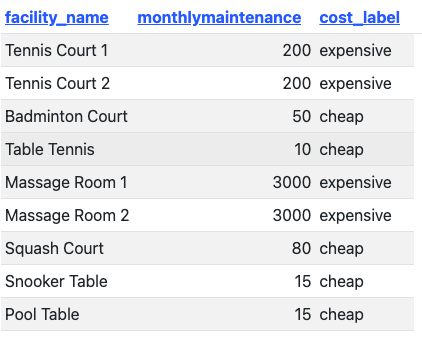

Q6: You'd like to get the first and last name of the last member(s) who signed up. Try not to use the LIMIT clause for your solution.

In [ ]:
SELECT firstname, surname
FROM Members
WHERE joindate = (SELECT MAX(joindate) FROM Members);


Darren	Smith


Q7: Produce a list of all members who have used a tennis court. Include in your output the name of the court, and the name of the member formatted as a single column. Ensure no duplicate data, and order by the member name.

In [ ]:
SELECT DISTINCT CONCAT(m.firstname, ' ', m.surname) AS member_name,
                f.name AS court_name
FROM Members m
JOIN Bookings b ON m.memid = b.memid
JOIN Facilities f ON b.facid = f.facid
WHERE f.name LIKE 'Tennis Court%'
ORDER BY member_name;




We use CONCAT to combine the first name and surname of each member into a single column called member_name.

We perform a series of JOIN operations to link the Members, Bookings, and Facilities tables based on their respective IDs (memid and facid).

The WHERE clause filters for facilities with names that start with "Tennis Court" (assuming that all tennis courts have names beginning with "Tennis Court").

Finally, we use ORDER BY to sort the results by member_name.


member_name   	court_name
Anne Baker	Tennis Court 1
Anne Baker	Tennis Court 2
Burton Tracy	Tennis Court 1
Burton Tracy	Tennis Court 2
Charles Owen	Tennis Court 2
Charles Owen	Tennis Court 1
Darren Smith	Tennis Court 2
David Farrell	Tennis Court 2
David Farrell	Tennis Court 1
David Jones	Tennis Court 1
David Jones	Tennis Court 2
David Pinker	Tennis Court 1
Douglas Jones	Tennis Court 1
Erica Crumpet	Tennis Court 1
Florence Bader	Tennis Court 1
Florence Bader	Tennis Court 2
Gerald Butters	Tennis Court 1
Gerald Butters	Tennis Court 2
GUEST GUEST	Tennis Court 2
GUEST GUEST	Tennis Court 1
Henrietta Rumney	Tennis Court 2
Jack Smith	Tennis Court 2
Jack Smith	Tennis Court 1
Janice Joplette	Tennis Court 2
Janice Joplette	Tennis Court 1
Jemima Farrell	Tennis Court 1
Jemima Farrell	Tennis Court 2
Joan Coplin	Tennis Court 1
John Hunt	Tennis Court 2
John Hunt	Tennis Court 1
Matthew Genting	Tennis Court 1
Millicent Purview	Tennis Court 2
Nancy Dare	Tennis Court 2
Nancy Dare	Tennis Court 1
Ponder Stibbons	Tennis Court 1
Ponder Stibbons	Tennis Court 2
Ramnaresh Sarwin	Tennis Court 2
Ramnaresh Sarwin	Tennis Court 1
Tim Boothe	Tennis Court 2
Tim Boothe	Tennis Court 1
Tim Rownam	Tennis Court 1
Tim Rownam	Tennis Court 2
Timothy Baker	Tennis Court 1
Timothy Baker	Tennis Court 2
Tracy Smith	Tennis Court 1
Tracy Smith	Tennis Court 2


Q8: Produce a list of bookings on the day of 2012-09-14 which will cost the member (or guest) more than $30. Remember that guests have different costs to members (the listed costs are per half-hour 'slot'), and the guest user's ID is always 0. Include in your output the name of the facility, the name of the member formatted as a single column, and the cost. Order by descending cost, and do not use any subqueries.

In [ ]:
SELECT CONCAT(m.firstname, ' ', m.surname) AS member_name,
       f.name AS facility_name,
       CASE
           WHEN b.memid = 0 THEN f.guestcost * b.slots
           ELSE f.membercost * b.slots
       END AS cost
FROM Bookings b
JOIN Members m ON b.memid = m.memid
JOIN Facilities f ON b.facid = f.facid
WHERE DATE(b.starttime) = '2012-09-14'
  AND (CASE
           WHEN b.memid = 0 THEN f.guestcost * b.slots
           ELSE f.membercost * b.slots
       END) > 30
ORDER BY cost DESC;



member_name	facility_name	cost
GUEST GUEST	Massage Room 2	320.0
GUEST GUEST	Massage Room 1	160.0
GUEST GUEST	Massage Room 1	160.0
GUEST GUEST	Massage Room 1	160.0
GUEST GUEST	Tennis Court 2	150.0
GUEST GUEST	Tennis Court 2	75.0
GUEST GUEST	Tennis Court 1	75.0
GUEST GUEST	Tennis Court 1	75.0
GUEST GUEST	Squash Court	70.0
Jemima Farrell	Massage Room 1	39.6
GUEST GUEST	Squash Court	35.0
GUEST GUEST	Squash Court	35.0


Q9: This time, produce the same result as in Q8, but using a subquery.

In [ ]:
SELECT CONCAT(Members.surname,' ',Members.firstname) AS mem_name,
  Members.memid,
  sub1.fac_name,
  sub1.Costs
  FROM Members

  RIGHT JOIN(
  	SELECT
  	Facilities.name as fac_name,
    Bookings.memid,
  	CASE WHEN Bookings.memid = 0 THEN Facilities.guestcost*Bookings.slots
       ELSE Facilities.membercost*Bookings.slots END AS Costs
    FROM Bookings
    LEFT JOIN Facilities
    ON Bookings.facid = Facilities.facid
    WHERE DATE_FORMAT(Bookings.starttime, '%Y-%m-%d') = '2012-09-14'
    HAVING Costs > 30
  	) sub1
  ON sub1.memid = Members.memid
  ORDER BY COSTS DESC



mem_name	memid	fac_name	Costs
GUEST GUEST	0	Massage Room 2	320.0
GUEST GUEST	0	Massage Room 1	160.0
GUEST GUEST	0	Massage Room 1	160.0
GUEST GUEST	0	Massage Room 1	160.0
GUEST GUEST	0	Tennis Court 2	150.0
GUEST GUEST	0	Tennis Court 1	75.0
GUEST GUEST	0	Tennis Court 1	75.0
GUEST GUEST	0	Tennis Court 2	75.0
GUEST GUEST	0	Squash Court	70.0
Farrell Jemima	13	Massage Room 1	39.6
GUEST GUEST	0	Squash Court	35.0
GUEST GUEST	0	Squash Court	35.0


In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [29]:
import pandas as pd

In [13]:
!pip install db-sqlite3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for db-sqlite3: filename=db_sqlite3-0.0.1-py3-none-any.whl size=1770 sha256=a472723f1d8bdc230056c232df5345ffdf3ad0a3343baed7c8f6ed2bfaea5bee
  Stored in directory: /root/.cache/pip/wheels/a6/b7/83/e941e0a0e04f417982e718ae7295d1e82b5f2863a1c51edd71
  Created wheel for db: filename=db-0.1.1-py3-none-any.whl size=3875 sha256=bf112b2ab7d09461f324ebdd7148d0769627e6ada12b053b7a5d386a845f0ed7
  Stored in directory: /root/.cache/pip/wheels/7d/e4/df/bc55b93af204ab098d9effec76f6889ad12d7ad74e833c4910
  Created wheel for antiorm: filename=antiorm-1.2.1-py3-none-any.whl size=31663 sha256=4fb55e8915ca9c15090c47619417a34ea131473a1008fa7614452ccc45d5e1e5
  Stored in directory: /root/.cache/pip/wheels/30/9f/7e/b7c95b391cfa77a9e722d359e9c669cf6c8d798d748aec5091
Successfully built db-sq

In [41]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('sqlite_db_pythonsqlite.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()
